# Problematic pdbs

Ligands loaded from pdb files do not have correct bond orders assigned. They can be fixed by obtaining their smiles 
and using it as a template to create a new molecule.

In this notebook we inspect some molecules that have issues when trying to fix their bonds

In [1]:
import os
import mdtraj as mdt
import nglview as nv
from rdkit.Chem import AllChem
from copy import deepcopy
from pprint import pprint

In [2]:
data_dir = "../../datasets/ligand-receptor/"
os.path.isdir(data_dir)

True

We load a bunch of molecules in pdb format whose bond orders failed to be fixed.

In [3]:
files = ['./test_cases/cruft/1aha/A_A_chain.pdb',
 './test_cases/cruft/1aha/A_B_chain.pdb',
 './test_cases/cruft/1rne/NAG_A_chain.pdb',
 './test_cases/cruft/1rne/NAG_B_chain.pdb',
 './test_cases/cruft/2plv/MYR_A_chain.pdb',
 './test_cases/cruft/2plv/MYR_F_chain.pdb',
 './test_cases/cruft/1aco/SF4_A_chain.pdb',
 './test_cases/cruft/1aco/SF4_B_chain.pdb',
 './test_cases/cruft/1hef/PJJ_A_chain.pdb',
 './test_cases/cruft/1hef/PJJ_B_chain.pdb',
 './test_cases/cruft/1blh/FOS_B_chain.pdb',
 './test_cases/cruft/1blh/FOS_A_chain.pdb',
 './test_cases/cruft/3gch/OAC_D_chain.pdb',
 './test_cases/cruft/3gch/OAC_A_chain.pdb',
 './test_cases/cruft/1phd/HEM_A_chain.pdb',
 './test_cases/cruft/1phd/HEM_B_chain.pdb',
 './test_cases/cruft/1igj/DGX_E_chain.pdb',
 './test_cases/cruft/1igj/DGX_F_chain.pdb',
 './test_cases/cruft/1igj/DGX_A_chain.pdb',
 './test_cases/cruft/1igj/DGX_B_chain.pdb',
 './test_cases/cruft/1apt/IVA_B_chain.pdb',
 './test_cases/cruft/1apt/MAN_C_chain.pdb',
 './test_cases/cruft/1apt/IVA_A_chain.pdb',
 './test_cases/cruft/1apt/MAN_A_chain.pdb',
 './test_cases/cruft/1dwd/MID_A_chain.pdb',
 './test_cases/cruft/1dwd/MID_D_chain.pdb',
 './test_cases/cruft/3ptb/BEN_B_chain.pdb',
 './test_cases/cruft/3ptb/BEN_A_chain.pdb',
 './test_cases/cruft/1lpm/MPA_A_chain.pdb',
 './test_cases/cruft/1lpm/MPA_C_chain.pdb',
 './test_cases/cruft/4est/VAI_A_chain.pdb',
 './test_cases/cruft/4est/FPA_B_chain.pdb',
 './test_cases/cruft/4est/FPA_A_chain.pdb',
 './test_cases/cruft/4est/VAI_B_chain.pdb',
 './test_cases/cruft/4phv/VAC_C_chain.pdb',
 './test_cases/cruft/4phv/VAC_A_chain.pdb',
 './test_cases/cruft/1pha/HEM_A_chain.pdb',
 './test_cases/cruft/1pha/HEM_B_chain.pdb',
 './test_cases/cruft/1nis/SF4_A_chain.pdb',
 './test_cases/cruft/1nis/SF4_B_chain.pdb',
 './test_cases/cruft/1phg/HEM_A_chain.pdb',
 './test_cases/cruft/1phg/HEM_B_chain.pdb',
 './test_cases/cruft/6rsa/UVC_B_chain.pdb',
 './test_cases/cruft/6rsa/UVC_A_chain.pdb',
 './test_cases/cruft/1ase/NOP_A_chain.pdb',
 './test_cases/cruft/1ase/NOP_B_chain.pdb',
 './test_cases/cruft/1ive/BMA_A_chain.pdb',
 './test_cases/cruft/1ive/NDG_J_chain.pdb',
 './test_cases/cruft/1ive/BMA_B_chain.pdb',
 './test_cases/cruft/1ive/BMA_D_chain.pdb',
 './test_cases/cruft/1ive/NDG_A_chain.pdb',
 './test_cases/cruft/1ive/NDG_F_chain.pdb',
 './test_cases/cruft/1ive/BMA_I_chain.pdb',
 './test_cases/cruft/1ive/BMA_E_chain.pdb',
 './test_cases/cruft/1ive/FUC_H_chain.pdb',
 './test_cases/cruft/1ive/BMA_H_chain.pdb',
 './test_cases/cruft/1ive/FUL_D_chain.pdb',
 './test_cases/cruft/1ive/FUC_A_chain.pdb',
 './test_cases/cruft/1ive/FUL_A_chain.pdb',
 './test_cases/cruft/1ive/BMA_C_chain.pdb',
 './test_cases/cruft/1tpp/APA_A_chain.pdb',
 './test_cases/cruft/1tpp/APA_B_chain.pdb',
 './test_cases/cruft/1slt/GAL_B_chain.pdb',
 './test_cases/cruft/1slt/GAL_A_chain.pdb',
 './test_cases/cruft/1slt/GAL_D_chain.pdb',
 './test_cases/cruft/1slt/GAL_C_chain.pdb',
 './test_cases/cruft/1mrg/ADN_A_chain.pdb',
 './test_cases/cruft/1mrg/ADN_B_chain.pdb',
 './test_cases/tyrosine kinase/1opj/MYR_A_chain.pdb',
 './test_cases/tyrosine kinase/1opj/MYR_D_chain.pdb',
 './test_cases/tyrosine kinase/1opj/MYR_B_chain.pdb',
 './test_cases/tyrosine kinase/1opj/MYR_C_chain.pdb',
 './test_cases/rhinovirus/1ncr/MYR_A_chain.pdb',
 './test_cases/rhinovirus/1ncr/MYR_F_chain.pdb',
 './test_cases/commonhitsapproach/1SQT/UI3_A_chain.pdb',
 './test_cases/commonhitsapproach/1SQT/UI3_B_chain.pdb',
 './test_cases/commonhitsapproach/1E66/NAG_A_chain.pdb',
 './test_cases/commonhitsapproach/1E66/NAG_B_chain.pdb',
 './test_cases/commonhitsapproach/3L5D/BDV_B_chain.pdb',
 './test_cases/commonhitsapproach/3L5D/BDV_A_chain.pdb',
 './test_cases/commonhitsapproach/3L5D/BDV_D_chain.pdb',
 './test_cases/commonhitsapproach/3L5D/BDV_C_chain.pdb',
 './test_cases/plip/4MWW/BMA_A_chain.pdb',
 './test_cases/plip/4MWW/BMA_B_chain.pdb']

## Filter files

We'll filter files that have the same ligand, so that we end up only with files with different ligands.

In [4]:
files_filtered = []
ligand_names = set()

for file_ in files:
    name = file_.split("/")[-1]
    name = name.split("_")[0]
    if name not in ligand_names:
        ligand_names.add(name)
        files_filtered.append(file_)

print(f"Num ligands {len(ligand_names)}")
pprint(files_filtered)

Num ligands 28
['./test_cases/cruft/1aha/A_A_chain.pdb',
 './test_cases/cruft/1rne/NAG_A_chain.pdb',
 './test_cases/cruft/2plv/MYR_A_chain.pdb',
 './test_cases/cruft/1aco/SF4_A_chain.pdb',
 './test_cases/cruft/1hef/PJJ_A_chain.pdb',
 './test_cases/cruft/1blh/FOS_B_chain.pdb',
 './test_cases/cruft/3gch/OAC_D_chain.pdb',
 './test_cases/cruft/1phd/HEM_A_chain.pdb',
 './test_cases/cruft/1igj/DGX_E_chain.pdb',
 './test_cases/cruft/1apt/IVA_B_chain.pdb',
 './test_cases/cruft/1apt/MAN_C_chain.pdb',
 './test_cases/cruft/1dwd/MID_A_chain.pdb',
 './test_cases/cruft/3ptb/BEN_B_chain.pdb',
 './test_cases/cruft/1lpm/MPA_A_chain.pdb',
 './test_cases/cruft/4est/VAI_A_chain.pdb',
 './test_cases/cruft/4est/FPA_B_chain.pdb',
 './test_cases/cruft/4phv/VAC_C_chain.pdb',
 './test_cases/cruft/6rsa/UVC_B_chain.pdb',
 './test_cases/cruft/1ase/NOP_A_chain.pdb',
 './test_cases/cruft/1ive/BMA_A_chain.pdb',
 './test_cases/cruft/1ive/NDG_J_chain.pdb',
 './test_cases/cruft/1ive/FUC_H_chain.pdb',
 './test_cases/cruf

## Loading molecules form pdb

We create and rdkit molecule for each pdb file. Some of them may fail to be loaded by rdkit

In [6]:
molecules = []
names = []
fails = []

for file_ in files_filtered:
    mol = AllChem.MolFromPDBFile(os.path.join(data_dir, file_))
    if mol is not None:
        name = file_.split("/")[-1]
        name = name.split("_")[0]
        molecules.append(mol)
        names.append(name)
    else:
        fails.append(file_)

print(f"Number of molecules: {len(molecules)}")
print(f"Number of molecules failed to be loaded {len(fails)}")

Number of molecules: 27
Number of molecules failed to be loaded 1


[12:53:18] Explicit valence for atom # 0 C, 7, is greater than permitted


## Inspect PDB files that couldn't be loaded


In [7]:
fails

['./test_cases/cruft/4phv/VAC_C_chain.pdb']

In [8]:
traj = mdt.load(os.path.join(data_dir, fails[0]))
traj

<mdtraj.Trajectory with 1 frames, 92 atoms, 2 residues, and unitcells at 0x7fc71a616050>

In [9]:
nv.show_mdtraj(traj)

NGLWidget()

There seems to be two ligands on top of each other, that is probably the reason it could not be loaded by rdkit.
This pdb file must be fixed first.

# Inspect the other molecules

### Adenine

In [10]:
print(names)

['A', 'NAG', 'MYR', 'SF4', 'PJJ', 'FOS', 'OAC', 'HEM', 'DGX', 'IVA', 'MAN', 'MID', 'BEN', 'MPA', 'VAI', 'FPA', 'UVC', 'NOP', 'BMA', 'NDG', 'FUC', 'FUL', 'APA', 'GAL', 'ADN', 'UI3', 'BDV']


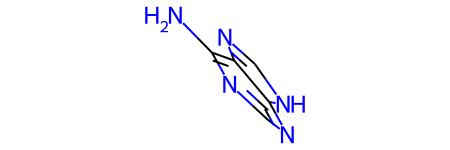

In [11]:
molecules[0] 

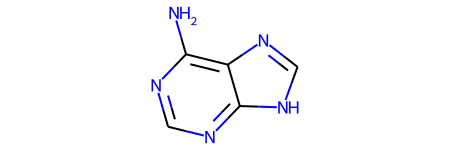

In [12]:
mol_A = deepcopy(molecules[0])
mol_A.RemoveAllConformers()
mol_A

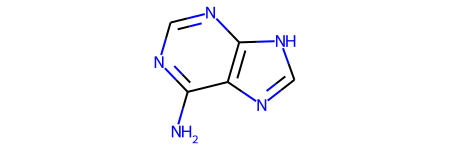

In [13]:
smiles_A = "c1[nH]c2c(n1)c(ncn2)N"
mol_A_smiles = AllChem.MolFromSmiles(smiles_A)
mol_A_smiles

We see that the molecules are the same, and the pdb mol contains the correct bond orders. What happens if we apply the assing bond orders function to a molecule whose bond orders are correct?

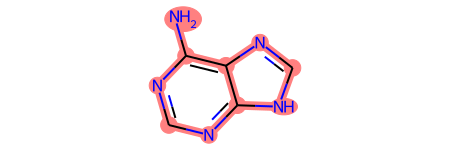

In [14]:
AllChem.AssignBondOrdersFromTemplate(mol_A_smiles, mol_A)

It doesn't raise an error. The reason it failes is probably beacause the ligand id is incorrect. It should not be A, the correct id is ADE

### Myristic Acid

Number of atoms 15


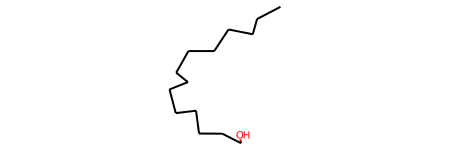

In [16]:
# Now we inspect myristic acid
myristic = molecules[2]
print(f"Number of atoms {myristic.GetNumAtoms()}")
myristic

Number of atoms 16


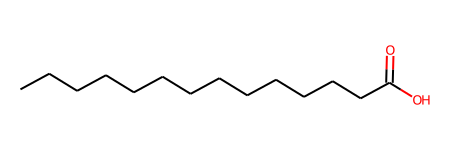

In [17]:
myristic_smiles = AllChem.MolFromSmiles("CCCCCCCCCCCCCC(=O)O")
print(f"Number of atoms {myristic_smiles.GetNumAtoms()}")
myristic_smiles

In [18]:
n_oxigens = len([atom for atom in myristic.GetAtoms() if atom.GetSymbol() == "O"])
n_oxigens_smiles = len([atom for atom in myristic_smiles.GetAtoms() if atom.GetSymbol() == "O"])

print(n_oxigens)
print(n_oxigens_smiles)

1
2


We see that an oxygen atom is missing. Therefore the molecule can not be corrected.

### NAG

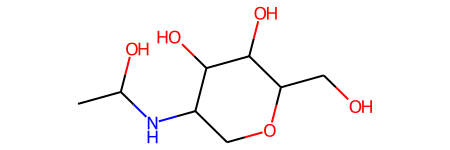

In [25]:
nag = deepcopy(molecules[1])
nag.RemoveAllConformers()
nag

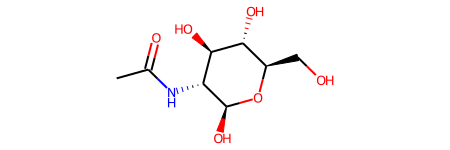

In [20]:
nag_smiles = AllChem.MolFromSmiles("CC(=O)N[C@@H]1[C@H]([C@@H]([C@H](O[C@H]1O)CO)O)O")
nag_smiles

In [26]:
n_oxigens = len([atom for atom in nag.GetAtoms() if atom.GetSymbol() == "O"])
n_oxigens_smiles = len([atom for atom in nag_smiles.GetAtoms() if atom.GetSymbol() == "O"])

print(n_oxigens)
print(n_oxigens_smiles)

5
6


Again an oxygen is missing.

### Adenosine

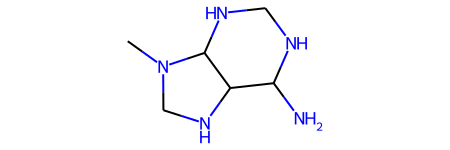

In [27]:
adenosine = deepcopy(molecules[-3])
adenosine.RemoveAllConformers()
adenosine

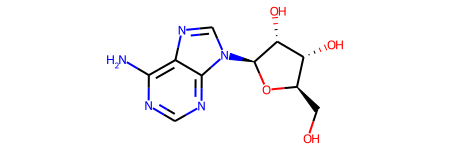

In [28]:
adenosine_smi = AllChem.MolFromSmiles("c1nc(c2c(n1)n(cn2)[C@H]3[C@@H]([C@@H]([C@H](O3)CO)O)O)N")
adenosine_smi

In [29]:
print(adenosine.GetNumAtoms())
print(adenosine_smi.GetNumAtoms())

11
19


Missing atoms